# **Part A**
Count / Frequency based Naive Bayes Classifier

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

# =======================================================
# TODO: Students must implement the following steps:
# 1. Complete the fit method in NaiveBayesClassifier (4 TODOs for log prior and log likelihood calculation).
# 2. Complete the predict method in NaiveBayesClassifier (2 TODOs for log probability accumulation and final argmax).
# 3. Complete the data loading calls in Section 2.
# 4. Initialize CountVectorizer with proper parameters in Section 3a.
# 5. Complete the feature transformation (fit_transform and transform) in Section 3a.
# 6. Initialize and fit the custom nb_model in Section 3b.
# 7. Use the fitted nb_model to generate predictions in Section 4.
# =======================================================



# Implementing Multinomial Naive Bayes from scratch
class NaiveBayesClassifier:
    """
    Multinomial Naive Bayes Classifier implemented from scratch.
    It is suitable for both Count and TF-IDF features.
    """
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_priors = {}
        self.feature_log_probs = {}
        self.classes = None
        self.vocabulary_size = 0

    def fit(self, X_counts, y):
        y_array = y.to_numpy()
        self.classes = np.unique(y_array)
        self.vocabulary_size = X_counts.shape[1]

        for c in self.classes:
            X_c = X_counts[y_array == c]

            # // TODO: Calculate the log prior and store it in self.class_priors[c]
            # Calculate Class Prior P(C): log(P(C))
            # P(C) = (Number of samples in class c) / (Total number of samples)
            self.class_priors[c] = None

            feature_sum = X_c.sum(axis=0).A1
            total_mass = np.sum(feature_sum)

            # Apply Laplace smoothing (additive smoothing, alpha=1.0 default):
            # P(w_i | C) = (count(w_i, C) + alpha) / (total_words_in_C + alpha * vocab_size)

            # // TODO: Calculate the numerator (with Laplace smoothing)
            numerator = None

            # // TODO: Calculate the denominator (with Laplace smoothing)
            denominator = None

            # // TODO: Calculate the log likelihood (log(numerator / denominator))
            self.feature_log_probs[c] = None

    def predict(self, X_counts):
        y_pred = []
        for i in range(X_counts.shape[0]):
            scores = {}

            x_i = X_counts.getrow(i)

            for c in self.classes:
                log_prob = self.class_priors[c]
                log_likelihoods = self.feature_log_probs[c]

                non_zero_indices = x_i.indices
                non_zero_data = x_i.data

                # // TODO: Complete the log probability calculation for the likelihood term
                # Add log likelihoods contribution (Log-Sum Trick):
                # log_prob += sum(count(w_i) * log(P(w_i|C)))

                log_prob += 0
                scores[c] = log_prob

            # // TODO: Find the key (class label) with the maximum score
            predicted_class = None

            y_pred.append(predicted_class)

        # // TODO: Return the final predictions array
        return None

In [6]:
# Data loading function (DO NOT CHANGE)
def load_pubmed_rct_file(filepath):
    """
    Reads a .txt file from the PubMed 20k RCT dataset.
    Returns a DataFrame with 'label' and 'sentence'.
    """
    labels, sentences = [], []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line or '\t' not in line:
                continue
            label, sent = line.split('\t', maxsplit=1)
            labels.append(label)
            sentences.append(sent)
    return pd.DataFrame({'label': labels, 'sentence': sentences})

# Load and Prepare Data (DO NOT CHANGE)
dir_path = './'
try:
    train_df = load_pubmed_rct_file(os.path.join(dir_path, 'train.txt'))
    dev_df   = load_pubmed_rct_file(os.path.join(dir_path, 'dev.txt'))
    test_df  = load_pubmed_rct_file(os.path.join(dir_path, 'test.txt'))

    # train_df = pd.DataFrame({'label': ['BACKGROUND'], 'sentence': ['placeholder']})
    # dev_df   = pd.DataFrame({'label': ['BACKGROUND'], 'sentence': ['placeholder']})
    # test_df  = pd.DataFrame({'label': ['BACKGROUND'], 'sentence': ['placeholder']})


    print(f"Train samples: {len(train_df)}")
    print(f"Dev   samples: {len(dev_df)}")
    print(f"Test  samples: {len(test_df)}")

    X_train, y_train = train_df['sentence'], train_df['label']
    X_dev,   y_dev   = dev_df['sentence'],   dev_df['label']
    X_test,  y_test  = test_df['sentence'],  test_df['label']
    target_names = sorted(y_train.unique())
    print(f"Classes: {target_names}")

except FileNotFoundError as e:
    print(f"Error: Dataset file not found. Please ensure the files are uploaded.")
    X_train, y_train = pd.Series([]), pd.Series([])
    X_test, y_test = pd.Series([]), pd.Series([])
    target_names = []

Train samples: 180040
Dev   samples: 30212
Test  samples: 30135
Classes: ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']


In [ ]:
# Feature Extraction and Custom Model Training
if X_train is not None and len(X_train) > 0:

    # Initialize and fit the CountVectorizer for count-based features
    count_vectorizer = CountVectorizer(
        lowercase=True,
        strip_accents='unicode',
        stop_words='english',
        # // TODO: Set appropriate ngram_range
        ngram_range=None,
        # // TODO: Set appropriate min_df
        min_df=None
    )

    print("Fitting Count Vectorizer and transforming training data...")
    # // TODO: Fit the vectorizer on X_train and transform
    X_train_counts = None
    if X_train_counts is not None:
        print(f"Vocabulary size: {X_train_counts.shape[1]}")

    print("Transforming test data...")
    # // TODO: Transform X_test using the fitted vectorizer
    X_test_counts = None


    # Train Custom Naive Bayes Classifier
    print("\nTraining the Custom Naive Bayes Classifier (from scratch)...")

    # // TODO: Initialize the custom NaiveBayesClassifier
    nb_model = None

    # // TODO: Fit the model using X_train_counts and y_train
    # nb_model.fit(...)
    print("Training complete.")

else:
    print("Skipping feature extraction and training: Training data is empty or not loaded.")

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# Colab cell 4 - vectorize (use unigrams by default; can change ngram_range)
count_vect = CountVectorizer(ngram_range=(1,1), min_df=3)  # adjust min_df as needed
X_train_counts = count_vect.fit_transform(train_df['sentence'])
X_dev_counts   = count_vect.transform(dev_df['sentence'])
X_test_counts  = count_vect.transform(test_df['sentence'])

y_train = train_df['label'].values
y_dev   = dev_df['label'].values
y_test  = test_df['label'].values

print("vocab size:", len(count_vect.vocabulary_))

vocab size: 30271


In [8]:
# Colab cell 5 - Naive Bayes from scratch
import scipy.sparse as sp
class NaiveBayesClassifier:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.classes_ = None
        self.class_count_ = None
        self.feature_count_ = None
        self.class_log_prior_ = None
        self.feature_log_prob_ = None

    def fit(self, X, y):
        # X: sparse count matrix (n_samples, n_features), y: array-like labels
        if sp.issparse(X):
            X = X.tocsr()
        self.classes_, class_indices = np.unique(y, return_inverse=True)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        # Count of samples per class
        class_count = np.bincount(class_indices)
        self.class_count_ = class_count

        # Initialize feature counts: shape (n_classes, n_features)
        feature_count = np.zeros((n_classes, n_features), dtype=np.float64)

        # Sum feature counts per class
        for idx, c in enumerate(self.classes_):
            rows = np.where(class_indices == idx)[0]
            if len(rows) == 0:
                continue
            Xc = X[rows]
            # sum along axis 0
            feature_count[idx, :] = Xc.sum(axis=0).A1 if sp.issparse(Xc) else Xc.sum(axis=0)

        self.feature_count_ = feature_count

        # Apply Laplace smoothing
        smoothed_fc = feature_count + self.alpha
        smoothed_feature_sum = smoothed_fc.sum(axis=1).reshape(-1,1)  # shape (n_classes,1)

        # log prob of feature given class
        self.feature_log_prob_ = np.log(smoothed_fc) - np.log(smoothed_feature_sum)

        # class log prior
        self.class_log_prior_ = np.log(class_count) - np.log(class_count.sum())

        return self

    def _joint_log_likelihood(self, X):
        # returns array shape (n_samples, n_classes)
        if sp.issparse(X):
            X = X.tocsr()
        n_samples = X.shape[0]
        jll = np.zeros((n_samples, len(self.classes_)))
        # compute X.dot(feature_log_prob_.T) + class_log_prior
        # careful with sparse X
        for i in range(len(self.classes_)):
            # feature_log_prob_[i] shape (n_features,)
            jll[:, i] = X.dot(self.feature_log_prob_[i].reshape(-1,1)).ravel() + self.class_log_prior_[i]
        return jll

    def predict(self, X):
        jll = self._joint_log_likelihood(X)
        idx = np.argmax(jll, axis=1)
        return self.classes_[idx]

    def predict_proba(self, X):
        jll = self._joint_log_likelihood(X)
        # convert log probs to normalized probabilities with log-sum-exp
        a = jll.max(axis=1).reshape(-1,1)
        exp = np.exp(jll - a)
        probs = exp / exp.sum(axis=1, keepdims=True)
        return probs


# **Part B**
TF-IDF score based Classifier

In [11]:
# Colab cell 6 - train & evaluate custom NB
nb_custom = NaiveBayesClassifier(alpha=1.0)
nb_custom.fit(X_train_counts, y_train)

y_pred_test = nb_custom.predict(X_test_counts)
print("Accuracy (custom NB):", accuracy_score(y_test, y_pred_test))
print("Macro F1   (custom NB):", f1_score(y_test, y_pred_test, average='macro'))
print("\nClassification report:\n", classification_report(y_test, y_pred_test))


Accuracy (custom NB): 0.7680438028870085
Macro F1   (custom NB): 0.7060139534604033

Classification report:
               precision    recall  f1-score   support

  BACKGROUND       0.58      0.61      0.59      3621
 CONCLUSIONS       0.66      0.70      0.68      4571
     METHODS       0.84      0.86      0.85      9897
   OBJECTIVE       0.56      0.56      0.56      2333
     RESULTS       0.87      0.81      0.84      9713

    accuracy                           0.77     30135
   macro avg       0.70      0.71      0.71     30135
weighted avg       0.77      0.77      0.77     30135



# **Part C**
Bayes Optimal Classifier

Part C Draft

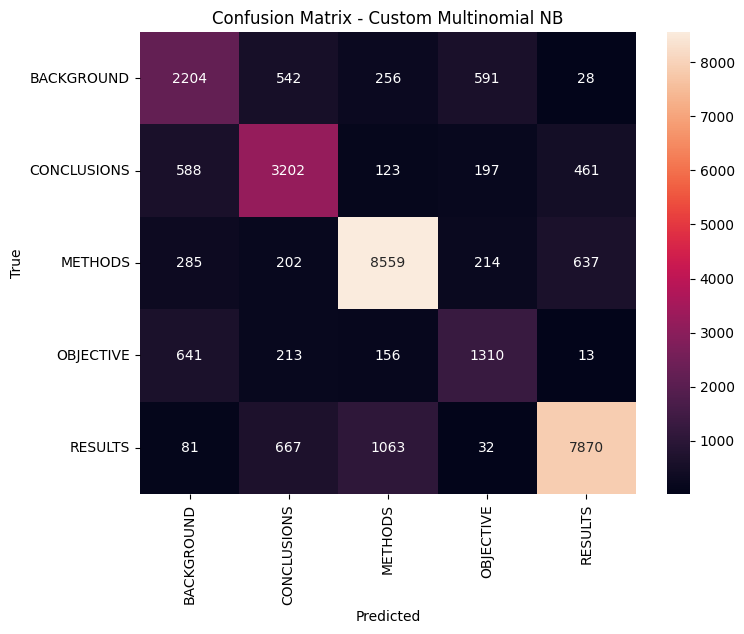

In [12]:
# Colab cell 7 - confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=nb_custom.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=nb_custom.classes_, yticklabels=nb_custom.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Custom Multinomial NB')
plt.show()


In [13]:
# Colab cell 8 - pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# quick baseline fit on train (optional)
pipeline.fit(train_df['sentence'], train_df['label'])
print("Baseline train score (accuracy):", pipeline.score(dev_df['sentence'], dev_df['label']))


Baseline train score (accuracy): 0.7317291142592347


In [14]:
# Colab cell 9 - grid search
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],            # unigrams and uni+bi
    'nb__alpha': [0.1, 0.5, 1.0, 2.0]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(dev_df['sentence'], dev_df['label'])  # crucial: fit on dev data per lab instructions

print("Best params:", grid.best_params_)
print("Best score (f1_macro on dev folds):", grid.best_score_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'nb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Best score (f1_macro on dev folds): 0.6567136968391226


Test Accuracy (best pipeline): 0.7604446656711465
Test Macro F1  (best pipeline): 0.659870171277922

Classification report:
               precision    recall  f1-score   support

  BACKGROUND       0.64      0.46      0.54      3621
 CONCLUSIONS       0.66      0.66      0.66      4571
     METHODS       0.77      0.92      0.84      9897
   OBJECTIVE       0.67      0.30      0.42      2333
     RESULTS       0.84      0.87      0.85      9713

    accuracy                           0.76     30135
   macro avg       0.71      0.64      0.66     30135
weighted avg       0.75      0.76      0.75     30135



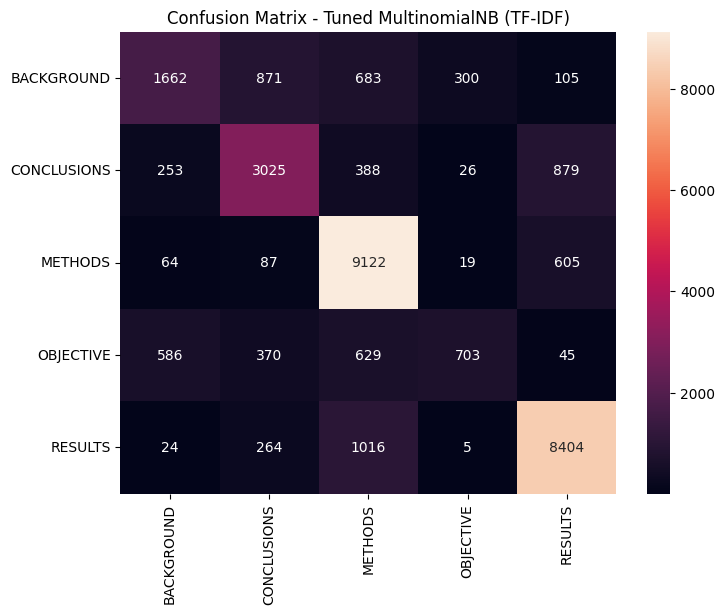

In [15]:
# Colab cell 10 - evaluate best pipeline on test set
y_pred_best = best_model.predict(test_df['sentence'])
print("Test Accuracy (best pipeline):", accuracy_score(test_df['label'], y_pred_best))
print("Test Macro F1  (best pipeline):", f1_score(test_df['label'], y_pred_best, average='macro'))
print("\nClassification report:\n", classification_report(test_df['label'], y_pred_best))

cm2 = confusion_matrix(test_df['label'], y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix - Tuned MultinomialNB (TF-IDF)')
plt.show()


In [36]:
# Colab cell 11 - sample training subset for BOC
srn = "PES2UG23CS670"  # keep your SRN as a string inside quotes
sample_frac = 0.2  # choose sample fraction (adjust per instruction)

X_train_sampled, X_unused, y_train_sampled, y_unused = train_test_split(
    train_df['sentence'], train_df['label'],
    train_size=sample_frac,
    random_state=random_state,
    stratify=train_df['label']
)

print("SRN:", srn)
print("Sampled size:", len(X_train_sampled))


SRN: PES2UG23CS670
Sampled size: 36008


In [21]:
# Colab cell 12 - sub-train and validation
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_train_sampled, y_train_sampled, test_size=0.3, random_state=random_state, stratify=y_train_sampled)

print("Sub-train:", X_subtrain.shape, "Validation:", X_val.shape)


Sub-train: (25205,) Validation: (10803,)


In [22]:
# Colab cell 13 - build vectorizer and fit on sub-train
vec = TfidfVectorizer(ngram_range=(1,2), min_df=2)  # choose same featurization across all models
X_subtrain_vec = vec.fit_transform(X_subtrain)
X_val_vec = vec.transform(X_val)
X_sampled_vec = vec.transform(X_train_sampled)  # for refit later


In [25]:
# Colab cell 14 - initialize base models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Assuming random_state comes from here

h1 = MultinomialNB(alpha=1.0)                # H1
h2 = LogisticRegression(max_iter=500, random_state=random_state)  # H2
h3 = RandomForestClassifier(n_estimators=200, random_state=random_state)  # H3
h4 = DecisionTreeClassifier(random_state=random_state)            # H4
h5 = KNeighborsClassifier(n_neighbors=5)                         # H5

hypotheses = [('mnb', h1), ('lr', h2), ('rf', h3), ('dt', h4), ('knn', h5)]

# Fit on sub-train
for name, clf in hypotheses:
    clf.fit(X_subtrain_vec, y_subtrain)
    print(f"Fitted {name}")

Fitted mnb
Fitted lr
Fitted rf
Fitted dt
Fitted knn


In [27]:
# Colab cell 15 - compute log-likelihoods
import math

log_likelihoods = {}
for name, clf in hypotheses:
    # get predicted probabilities for each class for every sample in val
    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(X_val_vec)  # shape (n_samples, n_classes)
        classes = clf.classes_
        # for each true label, find prob assigned
        idx_map = {c:i for i,c in enumerate(classes)}
        # Reset index of y_val to ensure integer-based access
        y_val_reset = y_val.reset_index(drop=True)
        p_true = np.array([probs[i, idx_map[y_val_reset[i]]] if y_val_reset[i] in idx_map else 1e-12
                           for i in range(len(y_val_reset))])
        # avoid zeros
        p_true = np.clip(p_true, 1e-12, None)
        log_lik = np.sum(np.log(p_true))
    else:
        # fallback: compute pseudo-prob from predict (1 for correct, 0 for incorrect) -> avoid zeros
        preds = clf.predict(X_val_vec)
        acc = np.mean(preds == y_val)
        # model assigns prob ~acc to true class on average; approximate
        log_lik = len(y_val) * np.log(max(acc, 1e-12))
    log_likelihoods[name] = float(log_lik)
    print(f"{name}: log-likelihood = {log_lik:.3f}")

# show in descending order
sorted_ll = sorted(log_likelihoods.items(), key=lambda x: x[1], reverse=True)
sorted_ll

mnb: log-likelihood = -8367.502
lr: log-likelihood = -6839.117
rf: log-likelihood = -8193.727
dt: log-likelihood = -106260.656
knn: log-likelihood = -198545.957


[('lr', -6839.116653407318),
 ('rf', -8193.727248272022),
 ('mnb', -8367.50232480454),
 ('dt', -106260.65642203805),
 ('knn', -198545.95696524036)]

In [28]:
# Colab cell 16 - compute posterior weights
ll_vals = np.array([log_likelihoods[name] for name, _ in hypotheses])
# To avoid overflow/underflow, shift by max
shift = ll_vals.max()
weights_unnorm = np.exp(ll_vals - shift)
weights = weights_unnorm / weights_unnorm.sum()

posterior_weights = {name: w for (name,_), w in zip(hypotheses, weights)}
print("Posterior weights (normalized):")
for name, w in posterior_weights.items():
    print(name, round(w,4))
# Convert to list in same order as hypotheses for VotingClassifier
weights_list = [posterior_weights[name] for name,_ in hypotheses]
weights_list


Posterior weights (normalized):
mnb 0.0
lr 1.0
rf 0.0
dt 0.0
knn 0.0


[np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

In [30]:
# Colab cell 17 - refit on full sampled set (optimized)
X_sampled_vec = vec.transform(X_train_sampled)

# Adjust model parameters for speed
for name, clf in hypotheses:
    if name == "rf":
        # Reduce number of trees and depth for faster training
        clf.set_params(n_estimators=100, max_depth=20)
    if name == "dt":
        # Limit max depth so it doesn't expand forever
        clf.set_params(max_depth=20)
    if name == "lr":
        # Ensure solver handles sparse data efficiently
        clf.set_params(solver='liblinear')

    print(f"Training {name}...")
    clf.fit(X_sampled_vec, y_train_sampled)
    print("Refitted", name)

print("✅ All models refitted successfully on sampled set.")


Training mnb...
Refitted mnb
Training lr...
Refitted lr
Training rf...
Refitted rf
Training dt...
Refitted dt
Training knn...
Refitted knn
✅ All models refitted successfully on sampled set.


In [32]:
# Colab cell 18 - VotingClassifier
from sklearn.ensemble import VotingClassifier

voters = [(name, clf) for name, clf in hypotheses]
boc_soft_voter = VotingClassifier(estimators=voters, voting='soft', weights=weights_list, n_jobs=-1)
boc_soft_voter.fit(X_sampled_vec, y_train_sampled)
print("BOC soft-voter trained.")

BOC soft-voter trained.


BOC Accuracy: 0.7906752945080471
BOC Macro F1: 0.7194288355466355

Classification report:
               precision    recall  f1-score   support

  BACKGROUND       0.65      0.56      0.61      3621
 CONCLUSIONS       0.71      0.68      0.70      4571
     METHODS       0.81      0.93      0.87      9897
   OBJECTIVE       0.71      0.47      0.57      2333
     RESULTS       0.86      0.87      0.86      9713

    accuracy                           0.79     30135
   macro avg       0.75      0.70      0.72     30135
weighted avg       0.78      0.79      0.78     30135



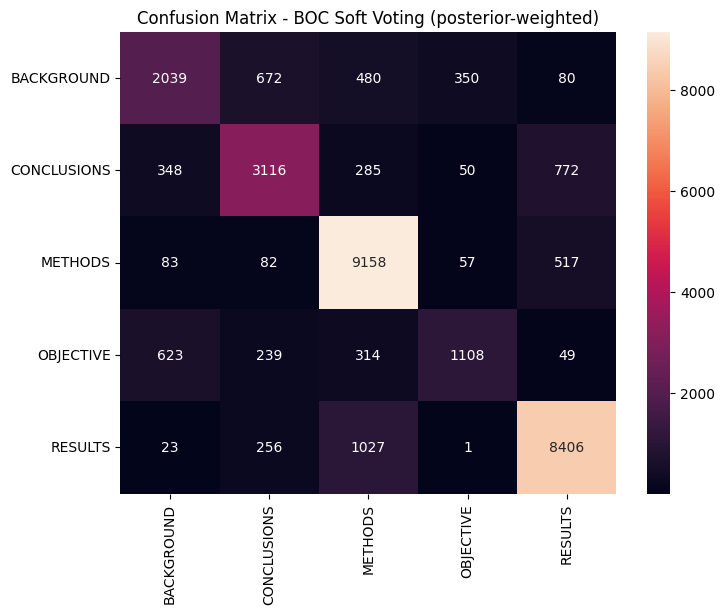

In [33]:
# Colab cell 19 - evaluate BOC
X_test_vec = vec.transform(test_df['sentence'])
y_test = test_df['label'].values

y_pred_boc = boc_soft_voter.predict(X_test_vec)
print("BOC Accuracy:", accuracy_score(y_test, y_pred_boc))
print("BOC Macro F1:", f1_score(y_test, y_pred_boc, average='macro'))
print("\nClassification report:\n", classification_report(y_test, y_pred_boc))

cm_boc = confusion_matrix(y_test, y_pred_boc, labels=boc_soft_voter.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_boc, annot=True, fmt='d', xticklabels=boc_soft_voter.classes_, yticklabels=boc_soft_voter.classes_)
plt.title('Confusion Matrix - BOC Soft Voting (posterior-weighted)')
plt.show()


Saved models and confusion matrices to current directory.


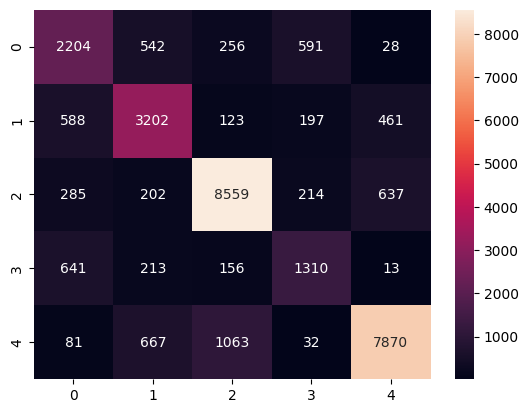

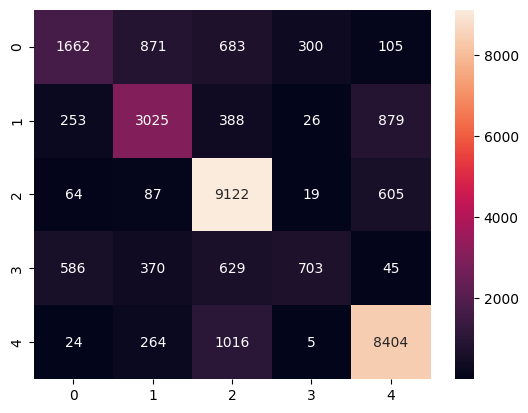

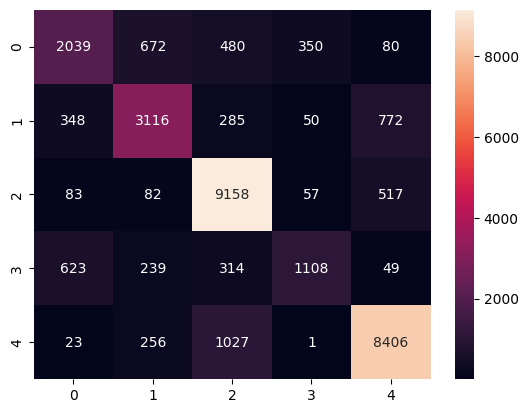

In [35]:
# Colab cell 20 - save models & images
import joblib
joblib.dump(nb_custom, "nb_custom.joblib")
joblib.dump(best_model, "best_pipeline.joblib")
joblib.dump(boc_soft_voter, "boc_soft_voter.joblib")
vec_path = "tfidf_vectorizer_sampled.joblib"
joblib.dump(vec, vec_path)

# Save figures (if created with plt.savefig)
plt.figure(); sns.heatmap(cm, annot=True, fmt='d'); plt.savefig("cm_custom_nb.png", bbox_inches="tight")
plt.figure(); sns.heatmap(cm2, annot=True, fmt='d'); plt.savefig("cm_tuned_nb.png", bbox_inches="tight")
plt.figure(); sns.heatmap(cm_boc, annot=True, fmt='d'); plt.savefig("cm_boc.png", bbox_inches="tight")

print("Saved models and confusion matrices to current directory.")